# Import Libraries

In [81]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [82]:
path = 'https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011)/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011).csv'
pollution = pd.read_csv(path)
pollution.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 4 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Entity                                                        331 non-null    object 
 1   Year                                                          331 non-null    int64  
 2   Smoke (Fouquet and DPCC (2011))                               301 non-null    float64
 3   Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))  331 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.5+ KB


In [83]:
pollution.isnull().sum()

Entity                                                           0
Year                                                             0
Smoke (Fouquet and DPCC (2011))                                 30
Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))     0
dtype: int64

In [84]:
pollution1 = pollution.copy()
pollution1

,Entity,Year,Smoke (Fouquet and DPCC (2011)),Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))
0,Delhi,1997,NaN,363.0
1,Delhi,1998,NaN,378.0
2,Delhi,1999,NaN,375.0
3,Delhi,2000,NaN,431.0
4,Delhi,2001,NaN,382.0
...,...,...,...,...
326,London,2012,NaN,17.0
327,London,2013,NaN,17.0
328,London,2014,NaN,17.0
329,London,2015,NaN,15.0


In [85]:
pollution1 = pollution1.rename(columns = {'Smoke (Fouquet and DPCC (2011))': 'Smoke', 'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))': 'SPM', 'Entity':'City'})
pollution1

,City,Year,Smoke,SPM
0,Delhi,1997,NaN,363.0
1,Delhi,1998,NaN,378.0
2,Delhi,1999,NaN,375.0
3,Delhi,2000,NaN,431.0
4,Delhi,2001,NaN,382.0
...,...,...,...,...
326,London,2012,NaN,17.0
327,London,2013,NaN,17.0
328,London,2014,NaN,17.0
329,London,2015,NaN,15.0


In [86]:
pollution1['Year'] = pollution1['Year'].apply(lambda x: datetime.strptime(str(x),'%Y'))


<Figure size 1200x600 with 0 Axes>

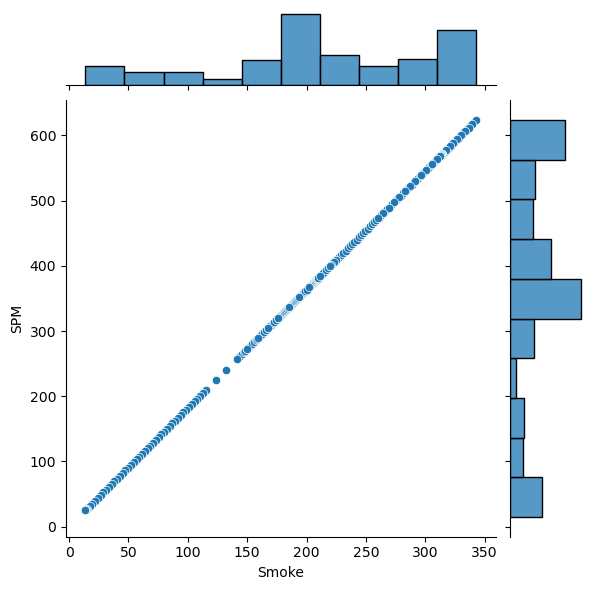

In [87]:
plt.figure(figsize = (12,6))
sns.jointplot(data = pollution1, x = 'Smoke', y = 'SPM', edgecolor = 'white')

In [88]:
pollution2 = pollution1.pivot(index = 'Year',columns = {'City'}, values = 'SPM')
# group by the dataframe
pollution2

City,Delhi,London
Year,,
1700-01-01,NaN,259.740260
1701-01-01,NaN,262.337662
1702-01-01,NaN,264.935065
1703-01-01,NaN,267.532467
1704-01-01,NaN,270.129870
...,...,...
2012-01-01,NaN,17.000000
2013-01-01,NaN,17.000000
2014-01-01,NaN,17.000000


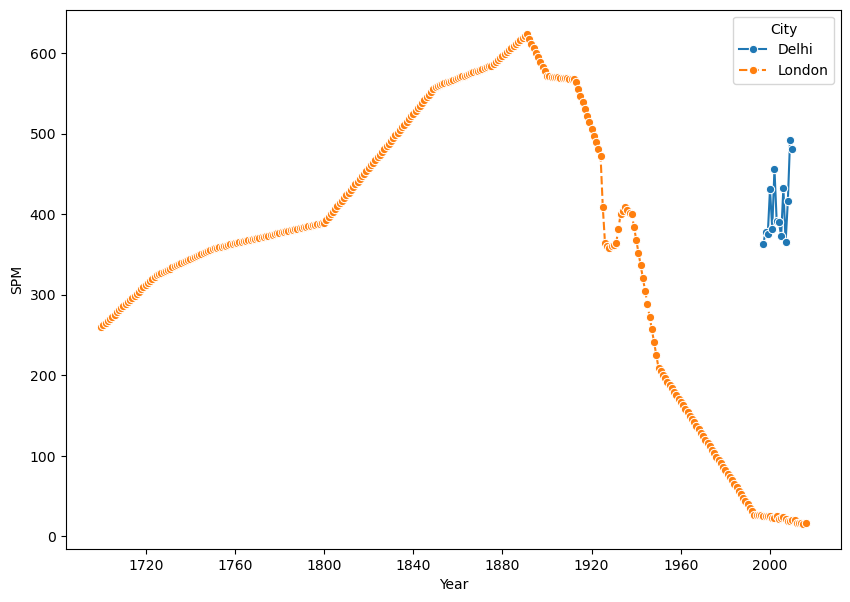

In [89]:
plt.figure(figsize = (10,7))
sns.lineplot(data = pollution2, marker = 'o')
plt.ylabel('SPM')
plt.show()

In [90]:
# import the dataset
path1 = 'https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/main/chapter2/monthly_csv.csv'
month = pd.read_csv(path1)
month.head()
month.info()
month.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  3288 non-null   object 
 1   Date    3288 non-null   object 
 2   Mean    3288 non-null   float64
dtypes: float64(1), object(2)
memory usage: 77.2+ KB


Source    0
Date      0
Mean      0
dtype: int64

In [91]:
month.Date = pd.to_datetime(month.Date)
month


,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292
...,...,...,...
3283,GISTEMP,1880-03-06,-0.1800
3284,GCAG,1880-02-06,-0.1229
3285,GISTEMP,1880-02-06,-0.2100
3286,GCAG,1880-01-06,0.0009


In [95]:
# group the month according to source
month1 = month.copy() 
month1 = month1.pivot(index = 'Date', columns = 'Source', values = 'Mean')
month1

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14
...,...,...
2016-08-06,0.8998,0.98
2016-09-06,0.8767,0.87
2016-10-06,0.7292,0.89
